In [107]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import cv2
import requests

from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy, mean_squared_error, BinaryCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import mobilenet_v2
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import mobilenet
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam, Nadam, RMSprop
import shutil
from keras.models import load_model

from PIL import Image

In [2]:
train_dir = "C:/Users/Admin/Diplom/dataset/train"
test_dir = "C:/Users/Admin/Diplom/dataset/test"

img_height = 224
img_weigth = 224

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir)
val_ds = tf.keras.utils.image_dataset_from_directory(test_dir)
class_names = dict(zip(train_ds.class_names, range(len(train_ds.class_names))))
num_classes = len(class_names)

Found 5787 files belonging to 200 classes.
Found 1419 files belonging to 200 classes.
Found 1419 files belonging to 200 classes.


In [99]:
print(class_names)

{'conditionally_edible-Amanita_fulva': 0, 'conditionally_edible-Amanita_rubescens': 1, 'conditionally_edible-Coprinopsis_atramentaria': 2, 'conditionally_edible-Lactarius_torminosus': 3, 'conditionally_edible-Lepista_saeva': 4, 'conditionally_edible-Morchella_esculenta': 5, 'conditionally_edible-Pleurocybella_porrigens': 6, 'conditionally_edible-Verpa_bohemica': 7, 'deadly-Amanita_arocheae': 8, 'deadly-Amanita_bisporigera': 9, 'deadly-Amanita_exitialis': 10, 'deadly-Amanita_fuliginea': 11, 'deadly-Amanita_magnivelaris': 12, 'deadly-Amanita_muscaria': 13, 'deadly-Amanita_ocreata': 14, 'deadly-Amanita_phalloides': 15, 'deadly-Amanita_smithiana': 16, 'deadly-Amanita_sphaerobulbosa': 17, 'deadly-Amanita_subjunquillea': 18, 'deadly-Amanita_subpallidorosea': 19, 'deadly-Amanita_verna': 20, 'deadly-Amanita_virosa': 21, 'deadly-Clitocybe_dealbata': 22, 'deadly-Clitocybe_rivulosa': 23, 'deadly-Cortinarius_eartoxicus': 24, 'deadly-Cortinarius_orellanus': 25, 'deadly-Cortinarius_rubellus': 26, 'd

In [7]:
train_generator = ImageDataGenerator(
preprocessing_function = mobilenet_v2.preprocess_input,
rotation_range = 32,
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
horizontal_flip = True,
fill_mode = "nearest")

In [10]:
train = train_generator.flow_from_directory(train_dir,
target_size = (img_height,img_weigth),
# изображение имеет 3 цветовых канала
color_mode = "rgb",
# создаем бинарные признаки меток класса 
class_mode = "categorical",
batch_size = 32,
shuffle = True,
seed = 123)

validation = train_generator.flow_from_directory(test_dir,
target_size = (img_height,img_weigth),
# изображение имеет 3 цветовых канала
color_mode = "rgb",
# создаем бинарные признаки меток класса 
class_mode = "categorical",
batch_size = 32,
shuffle = True,
seed = 123)

Found 5787 images belonging to 200 classes.
Found 1419 images belonging to 200 classes.


In [11]:
test = train_generator.flow_from_directory(test_dir,
target_size = (224,224),
color_mode = "rgb",
class_mode = "categorical",
batch_size = 32,
shuffle = False)

Found 1419 images belonging to 200 classes.


In [15]:
mobilenet_ = MobileNet(
input_shape = (img_height,img_weigth,3),
include_top = False,
weights = 'imagenet',
pooling = 'avg')

17225924/17225924 [==============================] - 2s 0us/step


In [16]:
#mobilenet_.trainable = False

In [18]:
for layer in mobilenet_.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in mobilenet_.layers[:20]:
    layer.trainable=False
for layer in mobilenet_.layers[20:]:
    layer.trainable=True

In [19]:
inputs = mobilenet_.input
x = Dense(128, activation = 'relu')(mobilenet_.output)
x = Dense(128, activation = 'relu')(x)
outputs = Dense(num_classes , activation = 'softmax')(x)

In [20]:
mobilenet = Model(inputs = inputs, outputs = outputs)

In [37]:
early_stopping = EarlyStopping(
	monitor='val_loss',
	mode='min',
	patience = 2,
	verbose=1,
	restore_best_weights=True,
)
checkpoint =ModelCheckpoint('C:/Users/Admin/Diplom/mushroom224mobile.h5',
                        	monitor = 'val_loss',
                        	mode = 'min',
                       	save_best_only = True)

callbacks = [early_stopping, checkpoint]

In [ ]:
mobilenet.compile(optimizer=’’, loss ='categorical_crossentropy',metrics = ['accuracy'])

In [25]:
history = mobilenet.fit(
train, validation_data = validation,
batch_size = 32,
epochs = 20,
callbacks = callbacks)

Epoch 1/20
181/181 [==============================] - 40s 221ms/step - loss: 1.9472 - accuracy: 0.4507 - val_loss: 4.1497 - val_accuracy: 0.2044
Epoch 2/20
181/181 [==============================] - 41s 225ms/step - loss: 1.8409 - accuracy: 0.4619 - val_loss: 3.1255 - val_accuracy: 0.2826
Epoch 3/20
181/181 [==============================] - 41s 224ms/step - loss: 1.7264 - accuracy: 0.4861 - val_loss: 3.5060 - val_accuracy: 0.2671
Epoch 4/20
181/181 [==============================] - 41s 225ms/step - loss: 1.6261 - accuracy: 0.5160 - val_loss: 3.2166 - val_accuracy: 0.3009
Epoch 4: early stopping


In [27]:
mob = load_model("C:/Users/Admin/Diplom/mushroom225mobile.h5")
history1 = mob.fit(
train, validation_data = validation,
batch_size = 32,
epochs = 20,
callbacks = callbacks)

Epoch 1/20
181/181 [==============================] - 41s 223ms/step - loss: 1.4566 - accuracy: 0.5616 - val_loss: 3.2589 - val_accuracy: 0.3340
Epoch 2/20
181/181 [==============================] - 41s 224ms/step - loss: 1.4098 - accuracy: 0.5692 - val_loss: 3.2522 - val_accuracy: 0.3087
Epoch 3/20
181/181 [==============================] - 41s 223ms/step - loss: 1.2776 - accuracy: 0.5972 - val_loss: 3.0194 - val_accuracy: 0.3467
Epoch 4/20
181/181 [==============================] - 42s 230ms/step - loss: 1.2145 - accuracy: 0.6124 - val_loss: 3.3168 - val_accuracy: 0.3432
Epoch 5/20
181/181 [==============================] - 41s 227ms/step - loss: 1.1628 - accuracy: 0.6321 - val_loss: 3.2269 - val_accuracy: 0.3319
Epoch 5: early stopping


In [29]:
history1 = mob1.fit(
train, validation_data = validation,
batch_size = 32,
epochs = 20,
callbacks = callbacks)

Epoch 1/20
181/181 [==============================] - 40s 220ms/step - loss: 1.1339 - accuracy: 0.6432 - val_loss: 3.4485 - val_accuracy: 0.3270
Epoch 2/20
181/181 [==============================] - 40s 223ms/step - loss: 1.1176 - accuracy: 0.6413 - val_loss: 3.5290 - val_accuracy: 0.3073
Epoch 3/20
181/181 [==============================] - 41s 227ms/step - loss: 1.0513 - accuracy: 0.6639 - val_loss: 3.3973 - val_accuracy: 0.3404
Epoch 4/20
181/181 [==============================] - 41s 228ms/step - loss: 0.9669 - accuracy: 0.6801 - val_loss: 3.0965 - val_accuracy: 0.3791
Epoch 5/20
181/181 [==============================] - 41s 225ms/step - loss: 0.9536 - accuracy: 0.6890 - val_loss: 3.3691 - val_accuracy: 0.3658
Epoch 6/20
181/181 [==============================] - 41s 226ms/step - loss: 0.9076 - accuracy: 0.6967 - val_loss: 3.3216 - val_accuracy: 0.3707
Epoch 6: early stopping


In [30]:
mob1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [31]:
mob1.save('such11mobil.h5')

In [61]:
mob12 = load_model("C:/Users/Admin/Diplom/mush13467mobile.h5")

In [90]:
for layer in mob14.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in mob14.layers[:84]:
    layer.trainable=False
for layer in mob14.layers[84:]:
    layer.trainable=True

In [117]:
mob14.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [66]:
history12 = mob13.fit(
train, validation_data = validation,
batch_size = 32,
epochs = 20,
callbacks = callbacks)

Epoch 1/20
181/181 [==============================] - 41s 221ms/step - loss: 0.3300 - accuracy: 0.8675 - val_loss: 3.5805 - val_accuracy: 0.4736
Epoch 2/20
181/181 [==============================] - 40s 219ms/step - loss: 0.3253 - accuracy: 0.8669 - val_loss: 3.6666 - val_accuracy: 0.4574
Epoch 3/20
181/181 [==============================] - 40s 220ms/step - loss: 0.3260 - accuracy: 0.8726 - val_loss: 3.5589 - val_accuracy: 0.4637
Epoch 4/20
181/181 [==============================] - 40s 221ms/step - loss: 0.3070 - accuracy: 0.8723 - val_loss: 3.8408 - val_accuracy: 0.4813
Epoch 5/20
181/181 [==============================] - 40s 222ms/step - loss: 0.2995 - accuracy: 0.8780 - val_loss: 3.5273 - val_accuracy: 0.4764
Epoch 6/20
181/181 [==============================] - 40s 223ms/step - loss: 0.3069 - accuracy: 0.8756 - val_loss: 3.7966 - val_accuracy: 0.4644
Epoch 7/20
181/181 [==============================] - 41s 224ms/step - loss: 0.2971 - accuracy: 0.8789 - val_loss: 3.7077 - val_ac

In [92]:
#mob14 = mob13
history13 = mob14.fit(
train, validation_data = validation,
batch_size = 32,
epochs = 20,
callbacks = callbacks)

Epoch 1/20
181/181 [==============================] - 39s 214ms/step - loss: 0.2633 - accuracy: 0.8837 - val_loss: 3.8660 - val_accuracy: 0.4792
Epoch 2/20
181/181 [==============================] - 39s 213ms/step - loss: 0.2477 - accuracy: 0.8887 - val_loss: 3.8789 - val_accuracy: 0.4708
Epoch 3/20
181/181 [==============================] - 39s 217ms/step - loss: 0.2583 - accuracy: 0.8873 - val_loss: 4.0259 - val_accuracy: 0.4630
Epoch 3: early stopping


In [120]:
mob14.save('mushroom13mobile.h5') #436%

In [93]:
(eval_loss, eval_accuracy) = mob14.evaluate(test)

45/45 [==============================] - 8s 164ms/step - loss: 3.8264 - accuracy: 0.4877


In [96]:
# получаем предсказанные значения от тестовых изображений
pred = mob14.predict(test)
# получаем номер класса с максимальным весом
pred = np.argmax(pred,axis=1)
# сопоставляем классы
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
# получаем предсказанные классы
y_test = [labels[k] for k in test.classes]
# оцениваем точность
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

45/45 [==============================] - 8s 168ms/step
Accuracy on the test set: 47.29%


In [111]:
def what(url):
    response = requests.get(url)
    image = np.array(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    predictions = mob14.predict(image)
    mushroom = os.listdir(train_dir)
    predicted_mush_index = np.argmax(predictions[0])
    predicted_mush = mushroom[predicted_mush_index]
    image = (image * 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
    plt.title(predicted_mush)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 17ms/step


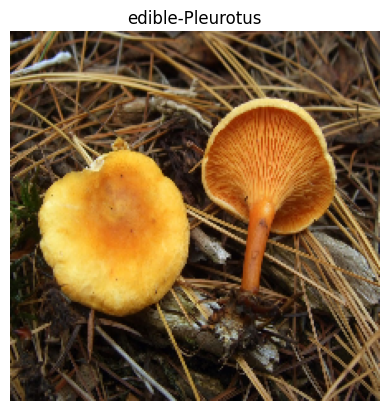

In [116]:
what('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Hygrophoropsis_aurantiaca_anglars.jpg/1200px-Hygrophoropsis_aurantiaca_anglars.jpg')

1/1 [==============================] - 0s 18ms/step


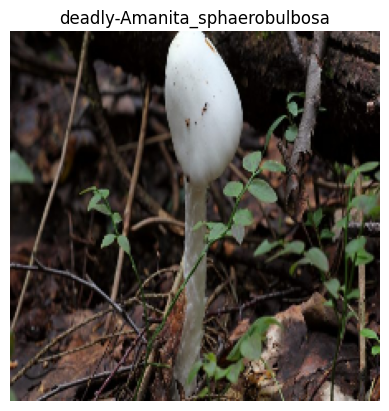

In [124]:
what('https://www.m-sokolov.ru/wordpress/wp-content/uploads/2014/08/img_3124-720x404.jpg')

1/1 [==============================] - 0s 18ms/step


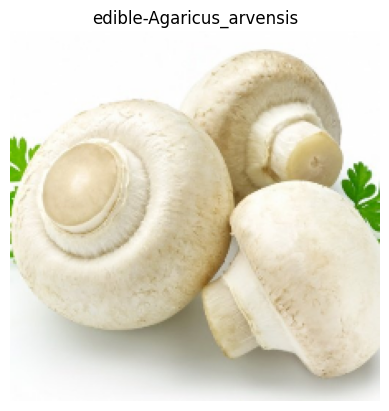

In [126]:
what('https://m.dom-eda.com/uploads/images/catalog/item/f55ace6212/02223542a6_500.jpg')

1/1 [==============================] - 0s 16ms/step


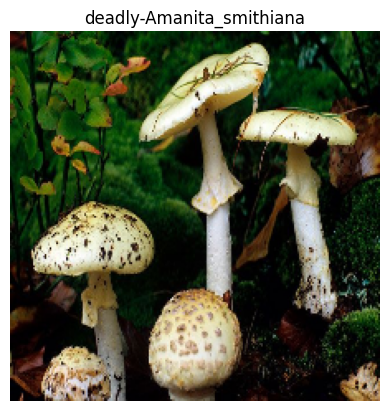

In [130]:
what('https://aif-s3.aif.ru/images/015/167/a578d93d8fa493aa9750583408d1f5d9.jpg')

1/1 [==============================] - 0s 17ms/step


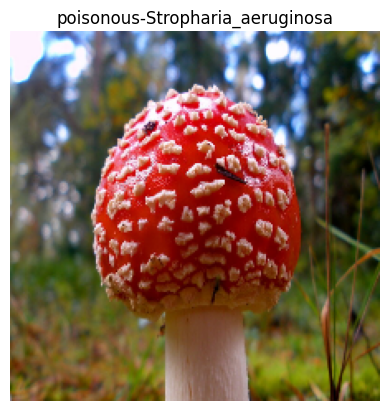

In [135]:
what('https://img-fotki.yandex.ru/get/5812/91396997.4d/0_8e74e_3b913b65_XL.jpg')